0.828920204649


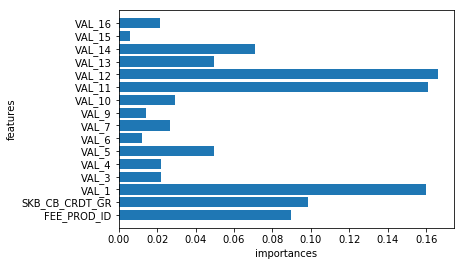

In [26]:
%matplotlib inline
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

nrows = None

feature_columns = ['FEE_PROD_ID','SKB_CB_CRDT_GR','VAL_1','VAL_3','VAL_4','VAL_5','VAL_6','VAL_7','VAL_9','VAL_10','VAL_11','VAL_12','VAL_13','VAL_14','VAL_15','VAL_16']
str_columns = ['FEE_PROD_ID', 'CO_CL_CD', 'SVC_CD', 'VAL_2', 'VAL_3', 'VAL_4', 'VAL_5', 'VAL_7']

csv = pd.read_csv('rawdata2.csv', nrows=nrows)

for col_nm in str_columns:
    try:
        le = LabelEncoder()
        le.fit(csv[col_nm])
        csv[col_nm] = le.transform(csv[col_nm])
    except TypeError as e:
        print(e, col_nm)
    except ValueError as e:
        print(e, col_nm)
        
#print(csv)

csv_data = csv[feature_columns]
csv_label = csv.iloc[:, 20]

train_data, test_data, train_label, test_label = train_test_split(csv_data, csv_label)

clf = RandomForestClassifier()
clf.fit(train_data, train_label)
pre = clf.predict(test_data)

ac_score = metrics.accuracy_score(test_label, pre)
print(ac_score)

n_features = csv_data.shape[1]
plt.barh(range(n_features), clf.feature_importances_, align='center')
plt.yticks(np.arange(n_features), csv_data.columns)
plt.xlabel("importances")
plt.ylabel("features")
plt.ylim(-1, n_features)
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(csv['FEE_PROD_ID'])

LabelEncoder()

In [18]:
clf.feature_importances_

array([ 0.07836402,  0.0005205 ,  0.01381162,  0.07649161,  0.15967309,
        0.00058923,  0.01397244,  0.03156168,  0.08154588,  0.00921782,
        0.0213817 ,  0.00036496,  0.01457285,  0.01915387,  0.16345904,
        0.17992524,  0.04555395,  0.0633097 ,  0.00728403,  0.01924677])

In [19]:
sum(clf.feature_importances_)

1.0

In [11]:
csv_data.columns

Index(['CO_CL_CD', 'SVC_CD', 'SKB_CB_CRDT_GR', 'VAL_1', 'VAL_2', 'VAL_3',
       'VAL_4', 'VAL_5', 'VAL_6', 'VAL_7', 'VAL_8', 'VAL_9', 'VAL_10',
       'VAL_11', 'VAL_12', 'VAL_13', 'VAL_14', 'VAL_15', 'VAL_16'],
      dtype='object')

In [8]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [9]:
type(cancer)

sklearn.datasets.base.Bunch

In [10]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')